In [1]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 9.5 MB/s eta 0:00:00


In [2]:
# Common imports including dataframe management, mapping, file io, and helpers for extraction zips and tars
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import mapclassify

import seaborn as sns


import zipfile, tarfile
import os

# Specific imports to add custom legends
import matplotlib.lines as mlines

In [3]:
# Small scale states shapefile from USGS
# !curl -o us-states-shapefile.tar.gz https://prd-tnm.s3.amazonaws.com/StagedProducts/Small-scale/data/Boundaries/statesp010g.shp_nt00938.tar.gz
# Census 5mil scale national shapefile
!curl -o us-states-shapefile.zip https://www2.census.gov/geo/tiger/GENZ2024/shp/cb_2024_us_all_5m.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.9M  100 25.9M    0     0  46.6M      0 --:--:-- --:--:-- --:--:-- 46.7M


In [4]:
# US Wind Turbine DB
!curl -o us-wind-turbines-shapefile.zip https://energy.usgs.gov/uswtdb/assets/data/uswtdbSHP.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3711k  100 3711k    0     0  10.3M      0 --:--:-- --:--:-- --:--:-- 10.3M


In [5]:
states_zipfile = zipfile.ZipFile('us-states-shapefile.zip')

us_states_data_dirname = 'states'
if not os.path.isdir(us_states_data_dirname):
  os.mkdir(us_states_data_dirname)
  states_zipfile.extractall(us_states_data_dirname)

census_state_zipfile = zipfile.ZipFile(os.path.join(us_states_data_dirname, 'cb_2024_us_state_5m.zip'))
census_state_dirname = os.path.join(us_states_data_dirname, 'census_state_5m')
if not os.path.isdir(census_state_dirname):
  os.mkdir(census_state_dirname)
  census_state_zipfile.extractall(census_state_dirname)


In [6]:
zipfile = zipfile.ZipFile('us-wind-turbines-shapefile.zip')

wind_turbine_data_dirname = 'wind-turbine-data'
if not os.path.isdir(wind_turbine_data_dirname):
  os.mkdir(wind_turbine_data_dirname)

zipfile.extractall(wind_turbine_data_dirname)

In [7]:
states_shpfile = 'cb_2024_us_state_5m.shp'
states_gdf = gpd.read_file(os.path.join(census_state_dirname, states_shpfile))
states_gdf

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198519809,726531289,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
1,72,01779808,0400000US72,72,PR,Puerto Rico,00,8869519701,4921758891,"MULTIPOLYGON (((-65.34244 18.34962, -65.33561 ..."
2,48,01779801,0400000US48,48,TX,Texas,00,676656702022,19011620342,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
3,21,01779786,0400000US21,21,KY,Kentucky,00,102266755818,2384136185,"MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ..."
4,39,01085497,0400000US39,39,OH,Ohio,00,105824130554,10274225585,"MULTIPOLYGON (((-82.7328 41.60432, -82.72107 4..."
5,13,01705317,0400000US13,13,GA,Georgia,00,149485762701,4419221858,"POLYGON ((-85.60516 34.98468, -85.5142 34.9835..."
6,05,00068085,0400000US05,05,AR,Arkansas,00,134658517854,3122715710,"POLYGON ((-94.61792 36.49941, -94.55929 36.499..."
7,41,01155107,0400000US41,41,OR,Oregon,00,248630421366,6168761370,"POLYGON ((-124.55244 42.84057, -124.50014 42.9..."
8,42,01779798,0400000US42,42,PA,Pennsylvania,00,115881476238,3397613881,"POLYGON ((-80.51989 40.90666, -80.51909 40.921..."
9,29,01779791,0400000US29,29,MO,Missouri,00,178052403953,2487375487,"POLYGON ((-95.77355 40.5782, -95.76853 40.5833..."


In [8]:
states_gdf.columns

Index(['STATEFP', 'STATENS', 'GEOIDFQ', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

### Map 1 - Wind Turbine locations in the United States

Layering a map of the shapefile from US Census Data and the shapefile of wind turbines from USGS.

In [9]:
tubrine_shpfile = 'uswtdb_V8_1_20250522.shp'
turbines_gdf = gpd.read_file(os.path.join(wind_turbine_data_dirname, tubrine_shpfile))
turbines_gdf.tail()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_retrofit,t_retro_yr,t_offshore,t_conf_atr,t_conf_loc,t_img_date,t_img_src,xlong,ylat,geometry
76046,3137112,36-226842,2019-WTE-170-OE,-9999,-9999,NY,Wyoming County,36121,unknown Wyoming County,-9999,...,0,-9999,0,1,1,2023-01-24,Maxar,-78.315376,42.528683,POINT (-78.31538 42.52868)
76047,3137060,36-226900,2019-WTE-9193-OE,-9999,-9999,NY,Wyoming County,36121,unknown Wyoming County,-9999,...,0,-9999,0,1,1,2023-01-24,Maxar,-78.348793,42.526249,POINT (-78.34879 42.52625)
76048,3040944,48-024978,2011-WTW-352-OE,41364,-9999,TX,Young County,48503,unknown Young County 1,2011,...,0,-9999,0,1,3,2018-07-16,Maxar,-98.551094,33.093292,POINT (-98.55109 33.09329)
76049,3055917,08-072245,2015-WTW-9994-OE,-9999,-9999,CO,Yuma County,08125,unknown Yuma County,2016,...,0,-9999,0,1,3,2017-05-17,Maxar,-102.717171,40.035072,POINT (-102.71717 40.03507)
76050,3055918,08-072237,2015-WTW-9995-OE,-9999,-9999,CO,Yuma County,08125,unknown Yuma County,2016,...,0,-9999,0,1,3,2017-05-17,Maxar,-102.716949,40.037548,POINT (-102.71695 40.03755)


In [10]:
turbines_gdf.columns

Index(['case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 'eia_id', 't_state',
       't_county', 't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu',
       't_model', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 't_retrofit',
       't_retro_yr', 't_offshore', 't_conf_atr', 't_conf_loc', 't_img_date',
       't_img_src', 'xlong', 'ylat', 'geometry'],
      dtype='object')

In [11]:
# FIPS codes/abbrv for US states and territories that are not on the mainland
# in order: Puerto Rico, Guam, American Samoa, Virgin Islands, Northern Mariana Islands, Alaska, Hawaii,
not_mainland_usa_fips = ["PR", "GU", "AS", "VI", "MP", "AK", "HI"]

states_gdf['STUSPS'] = states_gdf['STUSPS'].astype(str)
states_gdf = states_gdf.query("STUSPS not in @not_mainland_usa_fips")
states_gdf = states_gdf.reset_index(drop=True)
states_gdf


,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198519809,726531289,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
1,48,01779801,0400000US48,48,TX,Texas,00,676656702022,19011620342,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
2,21,01779786,0400000US21,21,KY,Kentucky,00,102266755818,2384136185,"MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105824130554,10274225585,"MULTIPOLYGON (((-82.7328 41.60432, -82.72107 4..."
4,13,01705317,0400000US13,13,GA,Georgia,00,149485762701,4419221858,"POLYGON ((-85.60516 34.98468, -85.5142 34.9835..."
5,05,00068085,0400000US05,05,AR,Arkansas,00,134658517854,3122715710,"POLYGON ((-94.61792 36.49941, -94.55929 36.499..."
6,41,01155107,0400000US41,41,OR,Oregon,00,248630421366,6168761370,"POLYGON ((-124.55244 42.84057, -124.50014 42.9..."
7,42,01779798,0400000US42,42,PA,Pennsylvania,00,115881476238,3397613881,"POLYGON ((-80.51989 40.90666, -80.51909 40.921..."
8,29,01779791,0400000US29,29,MO,Missouri,00,178052403953,2487375487,"POLYGON ((-95.77355 40.5782, -95.76853 40.5833..."
9,37,01027616,0400000US37,37,NC,North Carolina,00,125935965771,13453455061,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."


In [12]:
turbines_gdf['t_state'] = turbines_gdf['t_state'].astype(str)
turbines_gdf = turbines_gdf.query("t_state not in @not_mainland_usa_fips")
turbines_gdf = turbines_gdf.reset_index(drop=True)
turbines_gdf

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_retrofit,t_retro_yr,t_offshore,t_conf_atr,t_conf_loc,t_img_date,t_img_src,xlong,ylat,geometry
0,3119490,40-097498,2021-WTW-7911-OE,-9999,65511,OK,Ellis County,40045,25 Mile Creek,2022,...,0,-9999,0,3,3,2023-01-04,Maxar,-99.741096,36.423683,POINT (-99.7411 36.42368)
1,3124158,40-098166,2021-WTW-7917-OE,-9999,65511,OK,Ellis County,40045,25 Mile Creek,2022,...,0,-9999,0,3,3,2023-01-04,Maxar,-99.796494,36.503357,POINT (-99.79649 36.50336)
2,3123358,40-098173,2021-WTW-7871-OE,-9999,65511,OK,Ellis County,40045,25 Mile Creek,2022,...,0,-9999,0,3,3,2023-01-04,Maxar,-99.741119,36.502590,POINT (-99.74112 36.50259)
3,3123761,40-097539,2021-WTW-7888-OE,-9999,65511,OK,Ellis County,40045,25 Mile Creek,2022,...,0,-9999,0,3,3,2023-01-04,Maxar,-99.771027,36.456665,POINT (-99.77103 36.45667)
4,3124023,40-097763,2021-WTW-7894-OE,-9999,65511,OK,Ellis County,40045,25 Mile Creek,2022,...,0,-9999,0,3,3,2023-01-04,Maxar,-99.775742,36.445465,POINT (-99.77574 36.44547)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75710,3137112,36-226842,2019-WTE-170-OE,-9999,-9999,NY,Wyoming County,36121,unknown Wyoming County,-9999,...,0,-9999,0,1,1,2023-01-24,Maxar,-78.315376,42.528683,POINT (-78.31538 42.52868)
75711,3137060,36-226900,2019-WTE-9193-OE,-9999,-9999,NY,Wyoming County,36121,unknown Wyoming County,-9999,...,0,-9999,0,1,1,2023-01-24,Maxar,-78.348793,42.526249,POINT (-78.34879 42.52625)
75712,3040944,48-024978,2011-WTW-352-OE,41364,-9999,TX,Young County,48503,unknown Young County 1,2011,...,0,-9999,0,1,3,2018-07-16,Maxar,-98.551094,33.093292,POINT (-98.55109 33.09329)
75713,3055917,08-072245,2015-WTW-9994-OE,-9999,-9999,CO,Yuma County,08125,unknown Yuma County,2016,...,0,-9999,0,1,3,2017-05-17,Maxar,-102.717171,40.035072,POINT (-102.71717 40.03507)


<Axes: title={'center': 'Wind Turbine Locations'}>

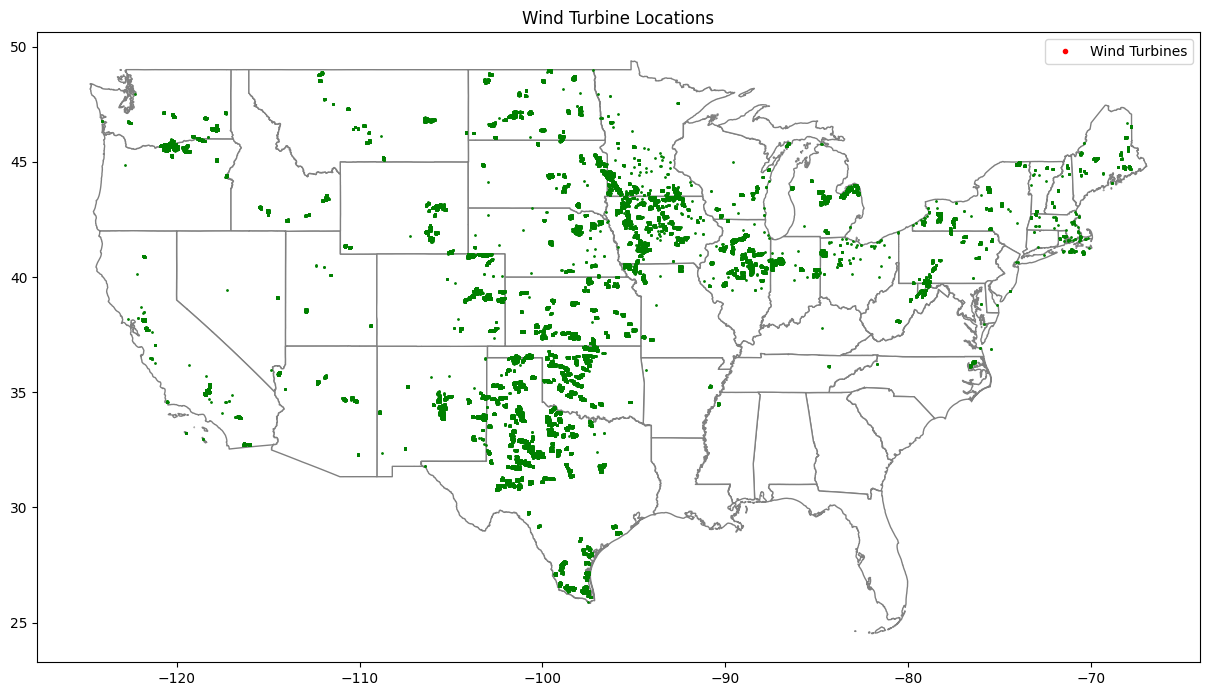

In [13]:
fig, ax = plt.subplots(1, figsize = (15, 10))

wind_turbine_legend = mlines.Line2D([], [], color='red', marker='o',
                          markersize=3, linestyle='', label='Wind Turbines')
ax.legend(handles=[wind_turbine_legend])
ax.set_title('Wind Turbine Locations')

states_gdf.plot(ax=ax, color='white', edgecolor='grey', linewidth=1)
turbines_gdf.plot(ax=ax, marker='o', color='green', markersize=1, legend=True)

### Map 2 - Average Wind Speed per State

From the wind supply curve dataset, we calculated the avg wind speed per state which is shown in the below map.

In [14]:
# Wind Supply curve from
!curl -o wind-speed.csv https://data.openei.org/files/6119/limited_access_2030_moderate_115hh_170rd_supply-curve.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8062k  100 8062k    0     0  11.4M      0 --:--:-- --:--:-- --:--:-- 11.4M


In [15]:
wind_speed_df = pd.read_csv('wind-speed.csv')
wind_speed_df = wind_speed_df.dropna()
wind_speed_df.head()

,area_sq_km,capacity_mw,cnty_fips,country,county,dist_km,elevation,latitude,lcot,longitude,...,reinforcement_dist_km,state,timezone,total_lcoe,trans_cap_cost_per_mw,reg_mult,turbine_capacity,sc_point_gid,hub_height,windspeed_m_per_s
0,2.5029,96.0,53009,United States,Clallam,50.203195,205.58824,48.347,25.766611,-124.653,...,380.864701,Washington,-8,51.562886,5.539306e+05,1.056176,6000,1543,115,7.75
1,2.1060,54.0,53009,United States,Clallam,45.533792,239.33333,48.376,39.346191,-124.495,...,380.864701,Washington,-8,67.125783,1.302007e+06,1.055045,6000,1544,115,7.32
2,12.6036,222.0,53009,United States,Clallam,35.910188,176.96875,48.253,30.781122,-124.604,...,380.864701,Washington,-8,60.455065,5.459865e+05,1.055727,6000,1923,115,6.90
3,4.8762,198.0,53009,United States,Clallam,85.679922,210.63333,48.282,22.736052,-124.447,...,312.365922,Washington,-8,50.302287,5.473159e+05,1.054523,6000,1924,115,7.20
4,3.3939,54.0,53009,United States,Clallam,46.208565,55.70000,48.131,39.202883,-124.712,...,380.864701,Washington,-8,71.840682,9.311974e+05,1.056586,6000,2302,115,6.65


In [16]:
wind_speed_df.columns

Index(['area_sq_km', 'capacity_mw', 'cnty_fips', 'country', 'county',
       'dist_km', 'elevation', 'latitude', 'lcot', 'longitude', 'mean_cf',
       'mean_lcoe', 'n_turbines', 'reinforcement_cost_per_mw',
       'reinforcement_dist_km', 'state', 'timezone', 'total_lcoe',
       'trans_cap_cost_per_mw', 'reg_mult', 'turbine_capacity', 'sc_point_gid',
       'hub_height', 'windspeed_m_per_s'],
      dtype='object')

In [17]:
grouped_by_state = wind_speed_df.groupby('state')
avg_wind_speeds_per_state_df = pd.DataFrame(grouped_by_state['windspeed_m_per_s'].mean()).reset_index('state')
avg_wind_speeds_per_state_df

,state,windspeed_m_per_s
0,Alabama,6.067399
1,Arizona,5.728714
2,Arkansas,6.627443
3,California,5.283187
4,Colorado,6.374335
5,Connecticut,7.716667
6,Florida,5.830424
7,Georgia,6.177038
8,Idaho,5.875448
9,Illinois,7.320858


In [18]:
states_condensed_gdf = states_gdf[['GEOIDFQ', 'GEOID', 'STUSPS', 'NAME',  'geometry']]

avg_wind_speed_over_states_gdf = states_condensed_gdf.merge(avg_wind_speeds_per_state_df, how='inner', left_on='NAME', right_on='state', indicator=True)

Text(0.5, 1.0, 'Average Wind Speed')

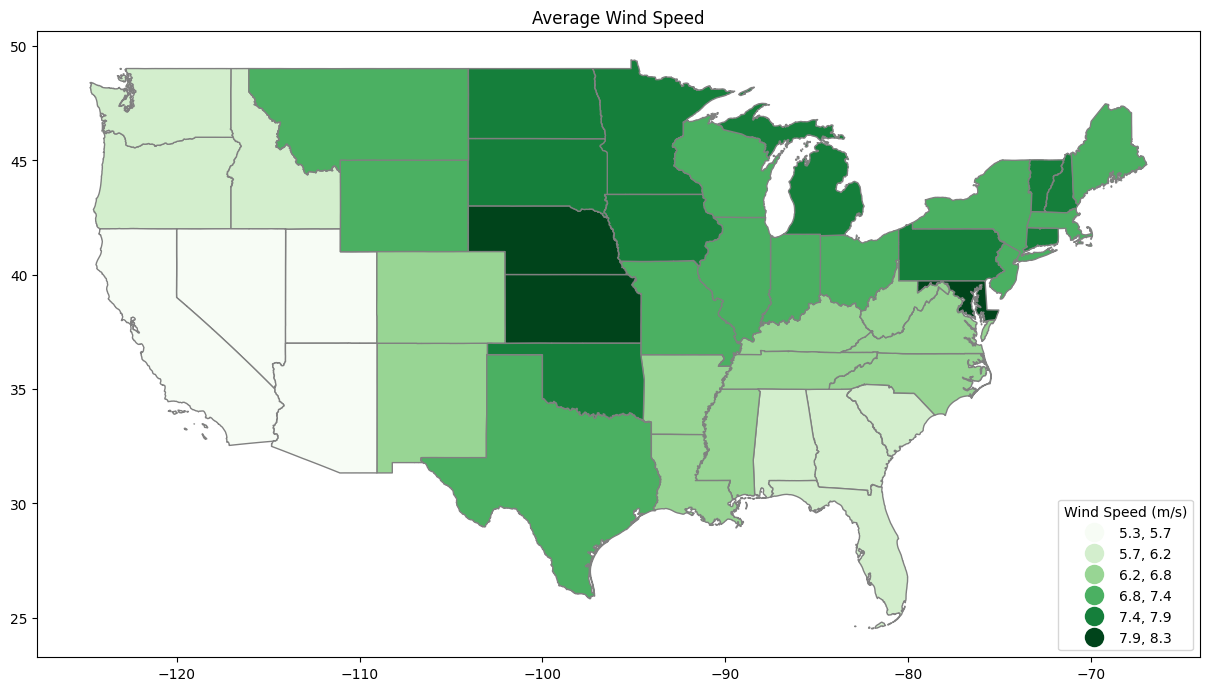

In [20]:
fig, ax = plt.subplots(1, figsize = (15, 10))
avg_wind_speed_over_states_gdf.plot(ax=ax, column='windspeed_m_per_s', legend=True,
                                    scheme='natural_breaks', k=6, cmap='Greens',
                                    edgecolor='grey',
                                    legend_kwds={"fmt": "{:,.1f}",'loc':'lower right','markerscale':1.4})

leg = ax.get_legend()
leg.set_title('Wind Speed (m/s)')
ax.set_title('Average Wind Speed')

### Map 3 - Number of wind turbines per state

Using the Wind Turbine Database again, we can calculate the total number of wind turbines in each state and map them categorically.

In [19]:
turbine_counts_df = pd.DataFrame(turbines_gdf.groupby('t_state')['case_id'].count()).reset_index('t_state')
turbine_counts_df

,t_state,case_id
0,AR,22
1,AZ,484
2,CA,5510
3,CO,2908
4,CT,3
5,DE,1
6,IA,6472
7,ID,588
8,IL,3837
9,IN,1651


In [21]:
states_condensed_gdf.merge(turbine_counts_df, left_on='STUSPS', right_on='t_state', how='outer', indicator=True)

,GEOIDFQ,GEOID,STUSPS,NAME,geometry,t_state,case_id,_merge
0,0400000US01,01,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",NaN,NaN,left_only
1,0400000US05,05,AR,Arkansas,"POLYGON ((-94.61792 36.49941, -94.55929 36.499...",AR,22.0,both
2,0400000US04,04,AZ,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",AZ,484.0,both
3,0400000US06,06,CA,California,"MULTIPOLYGON (((-118.60331 33.47732, -118.5956...",CA,5510.0,both
4,0400000US08,08,CO,Colorado,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",CO,2908.0,both
5,0400000US09,09,CT,Connecticut,"POLYGON ((-73.72778 41.1007, -73.69595 41.1154...",CT,3.0,both
6,0400000US11,11,DC,District of Columbia,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",NaN,NaN,left_only
7,0400000US10,10,DE,Delaware,"MULTIPOLYGON (((-75.57219 39.62952, -75.56132 ...",DE,1.0,both
8,0400000US12,12,FL,Florida,"MULTIPOLYGON (((-80.74309 24.86353, -80.71375 ...",NaN,NaN,left_only
9,0400000US13,13,GA,Georgia,"POLYGON ((-85.60516 34.98468, -85.5142 34.9835...",NaN,NaN,left_only


In [22]:
# Some states have no turbine data, setting their data to 0 after merging

turbines_per_state_gdf = states_condensed_gdf.merge(turbine_counts_df, left_on='STUSPS', right_on='t_state', how='left', indicator=True)
turbines_per_state_gdf.fillna(value={'case_id': '0.0'}, inplace=True)
turbines_per_state_gdf['case_id'] = pd.to_numeric(turbines_per_state_gdf['case_id'])
turbines_per_state_gdf.rename(columns={'case_id': 'turbine_count'}, inplace=True)
turbines_per_state_gdf

,GEOIDFQ,GEOID,STUSPS,NAME,geometry,t_state,turbine_count,_merge
0,0400000US35,35,NM,New Mexico,"POLYGON ((-109.05017 31.48, -109.04984 31.4995...",NM,2305.0,both
1,0400000US48,48,TX,Texas,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",TX,19415.0,both
2,0400000US21,21,KY,Kentucky,"MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ...",KY,1.0,both
3,0400000US39,39,OH,Ohio,"MULTIPOLYGON (((-82.7328 41.60432, -82.72107 4...",OH,502.0,both
4,0400000US13,13,GA,Georgia,"POLYGON ((-85.60516 34.98468, -85.5142 34.9835...",NaN,0.0,left_only
5,0400000US05,05,AR,Arkansas,"POLYGON ((-94.61792 36.49941, -94.55929 36.499...",AR,22.0,both
6,0400000US41,41,OR,Oregon,"POLYGON ((-124.55244 42.84057, -124.50014 42.9...",OR,2173.0,both
7,0400000US42,42,PA,Pennsylvania,"POLYGON ((-80.51989 40.90666, -80.51909 40.921...",PA,790.0,both
8,0400000US29,29,MO,Missouri,"POLYGON ((-95.77355 40.5782, -95.76853 40.5833...",MO,1108.0,both
9,0400000US37,37,NC,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",NC,152.0,both


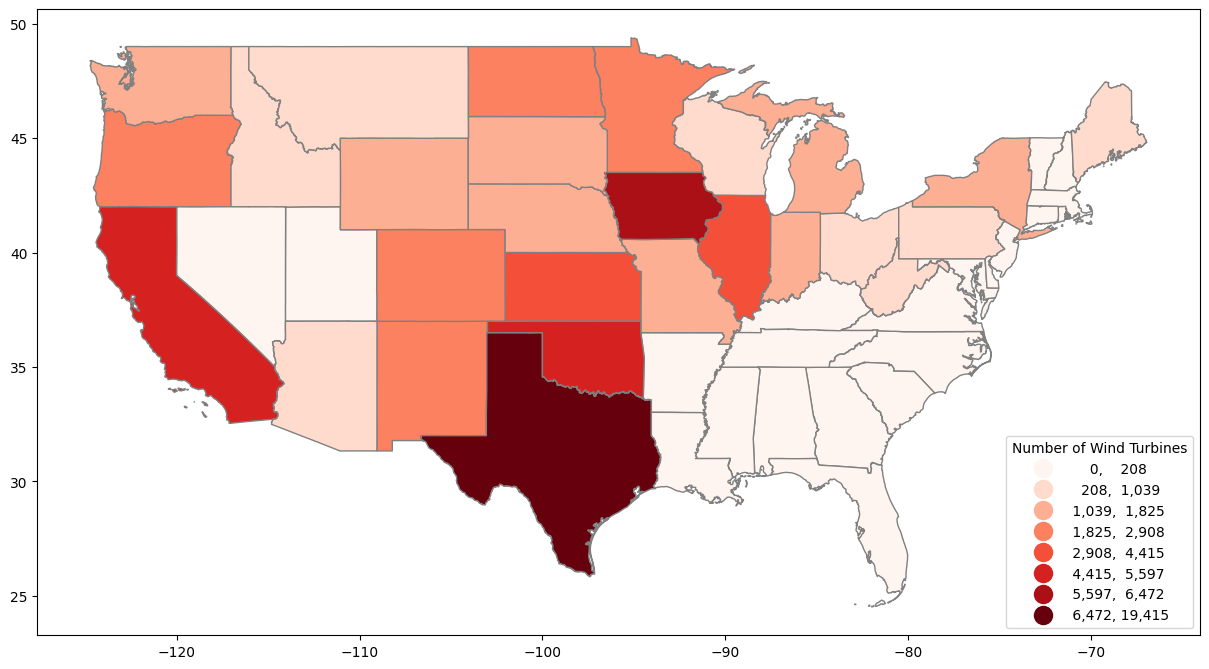

In [23]:
fig, ax = plt.subplots(1, figsize = (15, 10))
turbines_per_state_gdf.plot(ax=ax, column='turbine_count', legend=True,
                                    scheme='natural_breaks', k=8, cmap='Reds',
                                    edgecolor='grey',
                                    legend_kwds={"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})

leg = ax.get_legend()
leg.set_title('Number of Wind Turbines')